In [1]:
#imports for the lab
import pandas as pd
from sklearn import cluster
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors



In [2]:
#pre proccessing for compound data
compoundColumns=['1','2','Class'] 
compoundData = pd.read_csv('compound.txt', delimiter=r"\s+", names=compoundColumns)
compoundData = compoundData.drop(['Class'], axis=1)
compoundData

,1,2
0,26.75,22.15
1,29.80,22.15
2,31.55,21.10
3,27.70,20.85
4,29.90,19.95
...,...,...
394,15.85,9.95
395,15.35,9.90
396,15.60,9.45
397,15.30,9.15


In [3]:
#pre proccessing for compound data
flameColumns=['1','2','Class'] 
flameData = pd.read_csv('flame.txt', delimiter=r"\s+", names=flameColumns)
flameData = flameData.drop(['Class'], axis=1)
flameData

,1,2
0,1.85,27.80
1,1.35,26.65
2,1.40,23.25
3,0.85,23.05
4,0.50,22.35
...,...,...
235,7.50,26.20
236,7.50,25.65
237,7.05,25.85
238,6.90,27.15


In [4]:
#pre proccessing for compound data
pathbasedColumns=['1','2','Class'] 
pathbasedData = pd.read_csv('pathbased.txt', delimiter=r"\s+", names=pathbasedColumns)
pathbasedData = pathbasedData.drop(['Class'], axis=1)
pathbasedData

,1,2
0,11.25,5.05
1,10.95,4.70
2,9.85,5.80
3,9.80,5.75
4,9.15,6.80
...,...,...
295,17.50,18.05
296,16.65,17.50
297,15.45,17.30
298,15.45,17.80


In [5]:
#pre proccessing for compound data
spiralColumns=['1','2','Class'] 
spiralData = pd.read_csv('spiral.txt', delimiter=r"\s+", names=spiralColumns)
spiralData = spiralData.drop(['Class'], axis=1)
spiralData

,1,2
0,31.95,7.95
1,31.15,7.30
2,30.45,6.65
3,29.70,6.00
4,28.90,5.55
...,...,...
307,15.75,13.85
308,15.65,14.05
309,15.65,14.25
310,15.65,14.50


## part I

Compound data

<function matplotlib.pyplot.show(*args, **kw)>

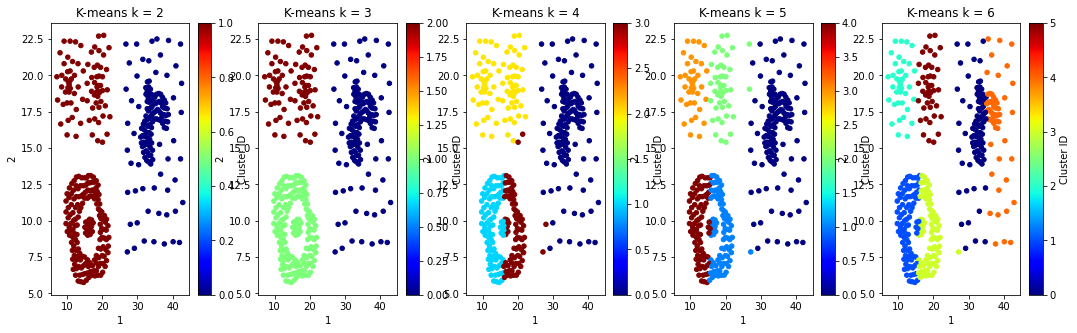

In [6]:
numClusters = [2,3,4,5,6]
SSE = []
results = []


for i in numClusters:
    k_means = cluster.KMeans(n_clusters=i, max_iter=50, random_state=1)
    k_means.fit(compoundData) 
    SSE.append(k_means.inertia_)
    label = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
    results.append(pd.concat((compoundData,label), axis=1))
    
    

fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(18,5))
results[0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means k = 2')
results[1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means k = 3')
results[2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax3)
ax3.set_title('K-means k = 4')
results[3].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax4)
ax4.set_title('K-means k = 5')
results[4].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax5)
ax5.set_title('K-means k = 6')
plt.show

Text(0, 0.5, 'SSE')

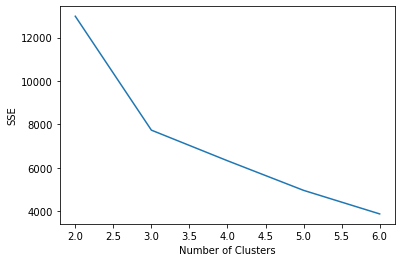

In [7]:
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

The SSE vs. Number of Clusters graph shows the rate at which error goes down given the number of clusters and is supported by the cluster graphs themselves. The elbow method shows that the ideal K is 3 and when comparing the cluster graphs by eye the K = 3 graph has the optimal grouping.

Flame Data

<function matplotlib.pyplot.show(*args, **kw)>

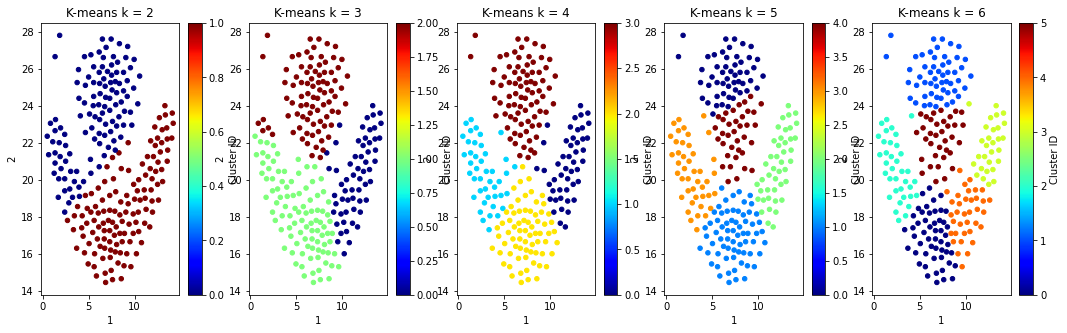

In [8]:
numClusters = [2,3,4,5,6]
SSE = []
results = []


for i in numClusters:
    k_means = cluster.KMeans(n_clusters=i, max_iter=50, random_state=1)
    k_means.fit(flameData) 
    SSE.append(k_means.inertia_)
    label = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
    results.append(pd.concat((flameData,label), axis=1))
    
    

fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(18,5))
results[0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means k = 2')
results[1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means k = 3')
results[2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax3)
ax3.set_title('K-means k = 4')
results[3].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax4)
ax4.set_title('K-means k = 5')
results[4].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax5)
ax5.set_title('K-means k = 6')
plt.show

Text(0, 0.5, 'SSE')

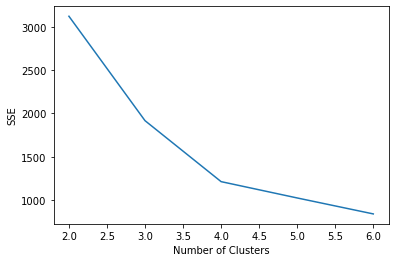

In [9]:
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

The SSE vs. Number of Clusters graph shows the rate at which error goes down given the number of clusters and is supported by the cluster graphs themselves. The elbow method shows that there are two possible Ks that are optimal, 3 and 4. When looking at hte cluster graphs themselves, one can see taht both 3 and 4 work as the number of clusters but 4 is slightly more accurate to more distant points.

pathbased data

<function matplotlib.pyplot.show(*args, **kw)>

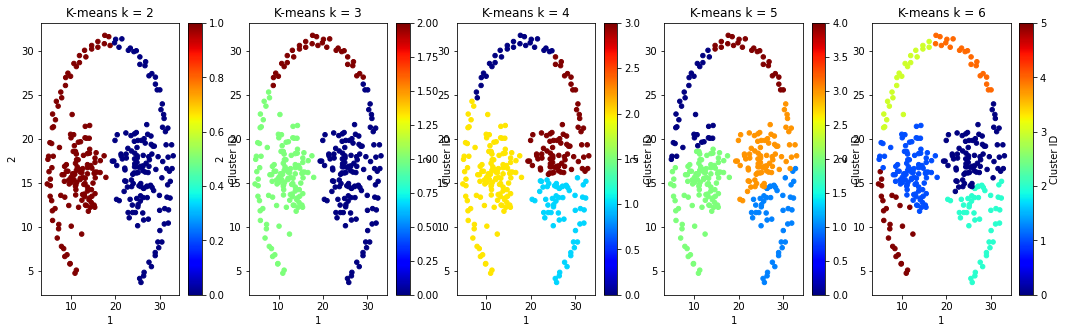

In [10]:
numClusters = [2,3,4,5,6]
SSE = []
results = []


for i in numClusters:
    k_means = cluster.KMeans(n_clusters=i, max_iter=50, random_state=1)
    k_means.fit(pathbasedData) 
    SSE.append(k_means.inertia_)
    label = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
    results.append(pd.concat((pathbasedData,label), axis=1))
    
    

fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(18,5))
results[0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means k = 2')
results[1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means k = 3')
results[2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax3)
ax3.set_title('K-means k = 4')
results[3].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax4)
ax4.set_title('K-means k = 5')
results[4].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax5)
ax5.set_title('K-means k = 6')
plt.show

Text(0, 0.5, 'SSE')

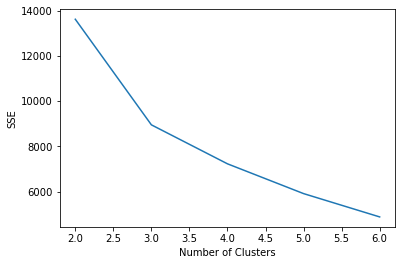

In [11]:
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

The SSE vs. Number of Clusters graph shows the rate at which error goes down given the number of clusters and is supported by the cluster graphs themselves. As in the compound data the optimal number of clusters is 3 using the elbow method. This is supported by the cluster graphs as in the higher number of clusters it is simply cutting up the clusters into smaller and less efficient groups.

spiral Data

<function matplotlib.pyplot.show(*args, **kw)>

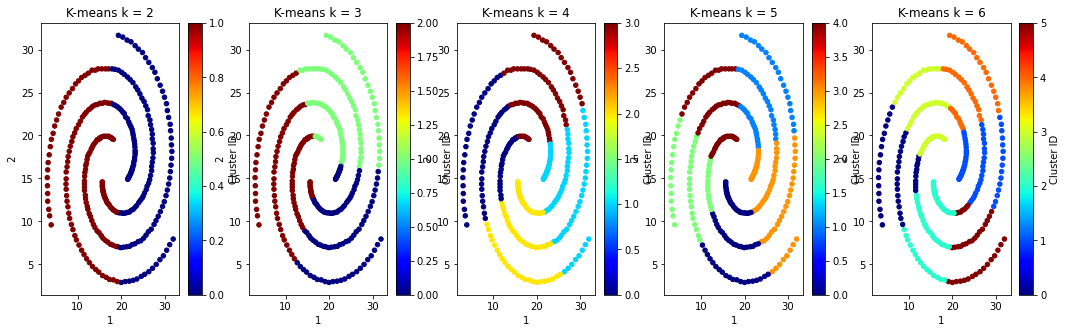

In [12]:
numClusters = [2,3,4,5,6]
SSE = []
results = []


for i in numClusters:
    k_means = cluster.KMeans(n_clusters=i, max_iter=50, random_state=1)
    k_means.fit(spiralData) 
    SSE.append(k_means.inertia_)
    label = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
    results.append(pd.concat((spiralData,label), axis=1))
    
    

fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(18,5))
results[0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means k = 2')
results[1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means k = 3')
results[2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax3)
ax3.set_title('K-means k = 4')
results[3].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax4)
ax4.set_title('K-means k = 5')
results[4].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=ax5)
ax5.set_title('K-means k = 6')
plt.show

Text(0, 0.5, 'SSE')

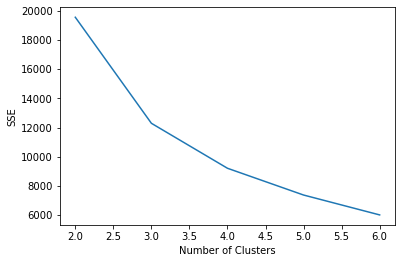

In [13]:
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

The SSE vs. Number of Clusters graph shows the rate at which error goes down given the number of clusters and is supported by the cluster graphs themselves. similarly to the flame data the optimal number of clusters is 3 or 4 using the elbow method. The cluster grpahs support this as in the k = 3 and k = 4 graphs, they both have reasonable groupings for the data

## Part II

Compound data

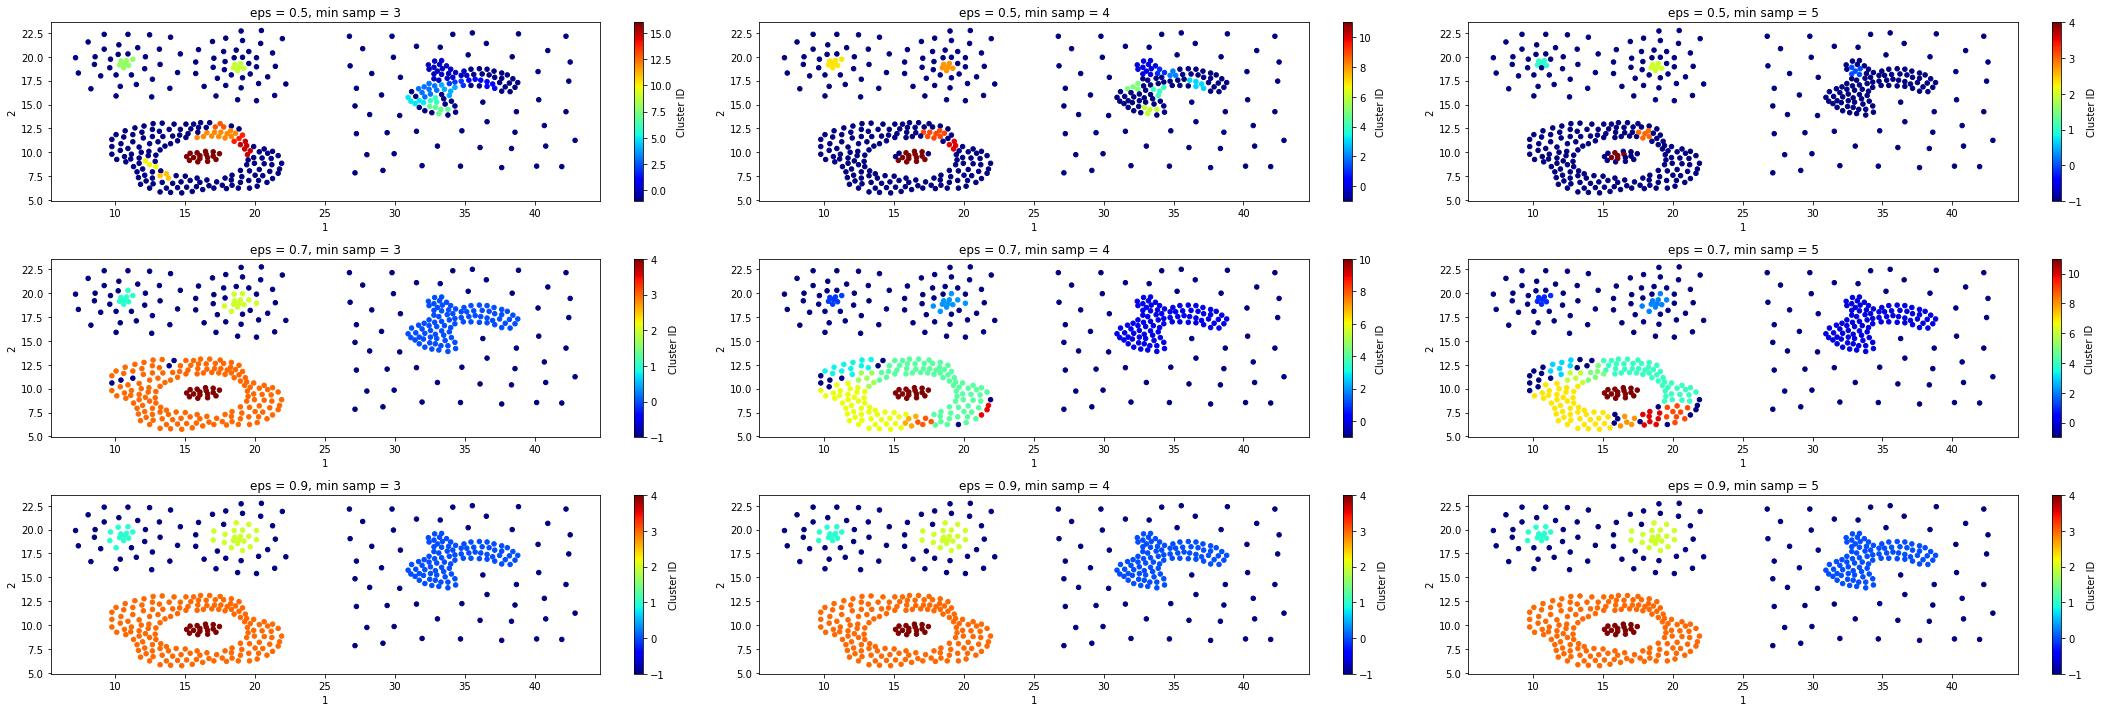

In [14]:
#generate graphs for data with DBSCAN
#lists for the algorithm to run through and use as values for epsilon and min sample
EPs = [0.5, 0.7, 0.9]
minSamples = [3,4,5]
resultRow = []
results = []

for i in EPs:
    resultRow = []
    for j in minSamples:
        db = DBSCAN(eps=i, min_samples=j).fit(compoundData)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
        result = pd.concat((compoundData,labels), axis=1)
        resultRow.append(result)
        
    results.append(resultRow)
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30,10))
results[0][0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[0,0])
axs[0,0].set_title('eps = 0.5, min samp = 3')
results[0][1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[0,1])
axs[0,1].set_title('eps = 0.5, min samp = 4')
results[0][2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[0,2])
axs[0,2].set_title('eps = 0.5, min samp = 5')
results[1][0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[1,0])
axs[1,0].set_title('eps = 0.7, min samp = 3')
results[1][1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[1,1])
axs[1,1].set_title('eps = 0.7, min samp = 4')
results[1][2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[1,2])
axs[1,2].set_title('eps = 0.7, min samp = 5')
results[2][0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[2,0])
axs[2,0].set_title('eps = 0.9, min samp = 3')
results[2][1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[2,1])
axs[2,1].set_title('eps = 0.9, min samp = 4')
results[2][2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[2,2])
axs[2,2].set_title('eps = 0.9, min samp = 5')
fig.tight_layout()
plt.show()


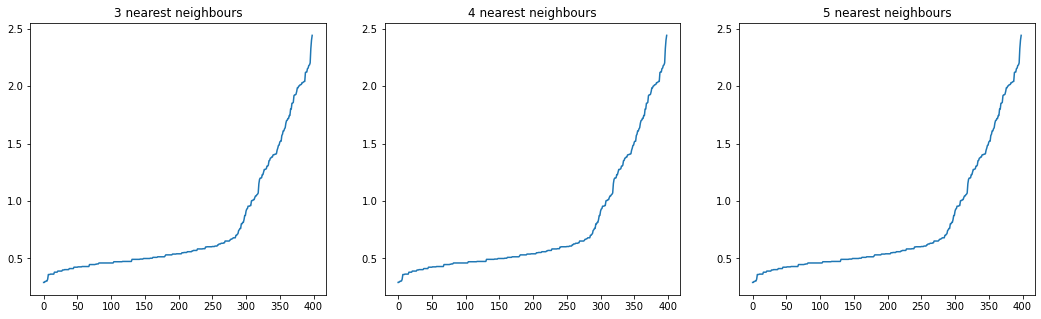

In [15]:
NNs = [3,4,5]

distanceList = []


for i in NNs:
    neighbors = NearestNeighbors(n_neighbors=i)
    neighbors_fit = neighbors.fit(compoundData)
    distances, indices = neighbors_fit.kneighbors(compoundData)   
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    distanceList.append(distances)


fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
ax1.plot(distanceList[0])
ax1.set_title('3 nearest neighbours')
ax2.plot(distanceList[1])
ax2.set_title('4 nearest neighbours')
ax3.plot(distanceList[2])
ax3.set_title('5 nearest neighbours')

plt.show()


Flame data

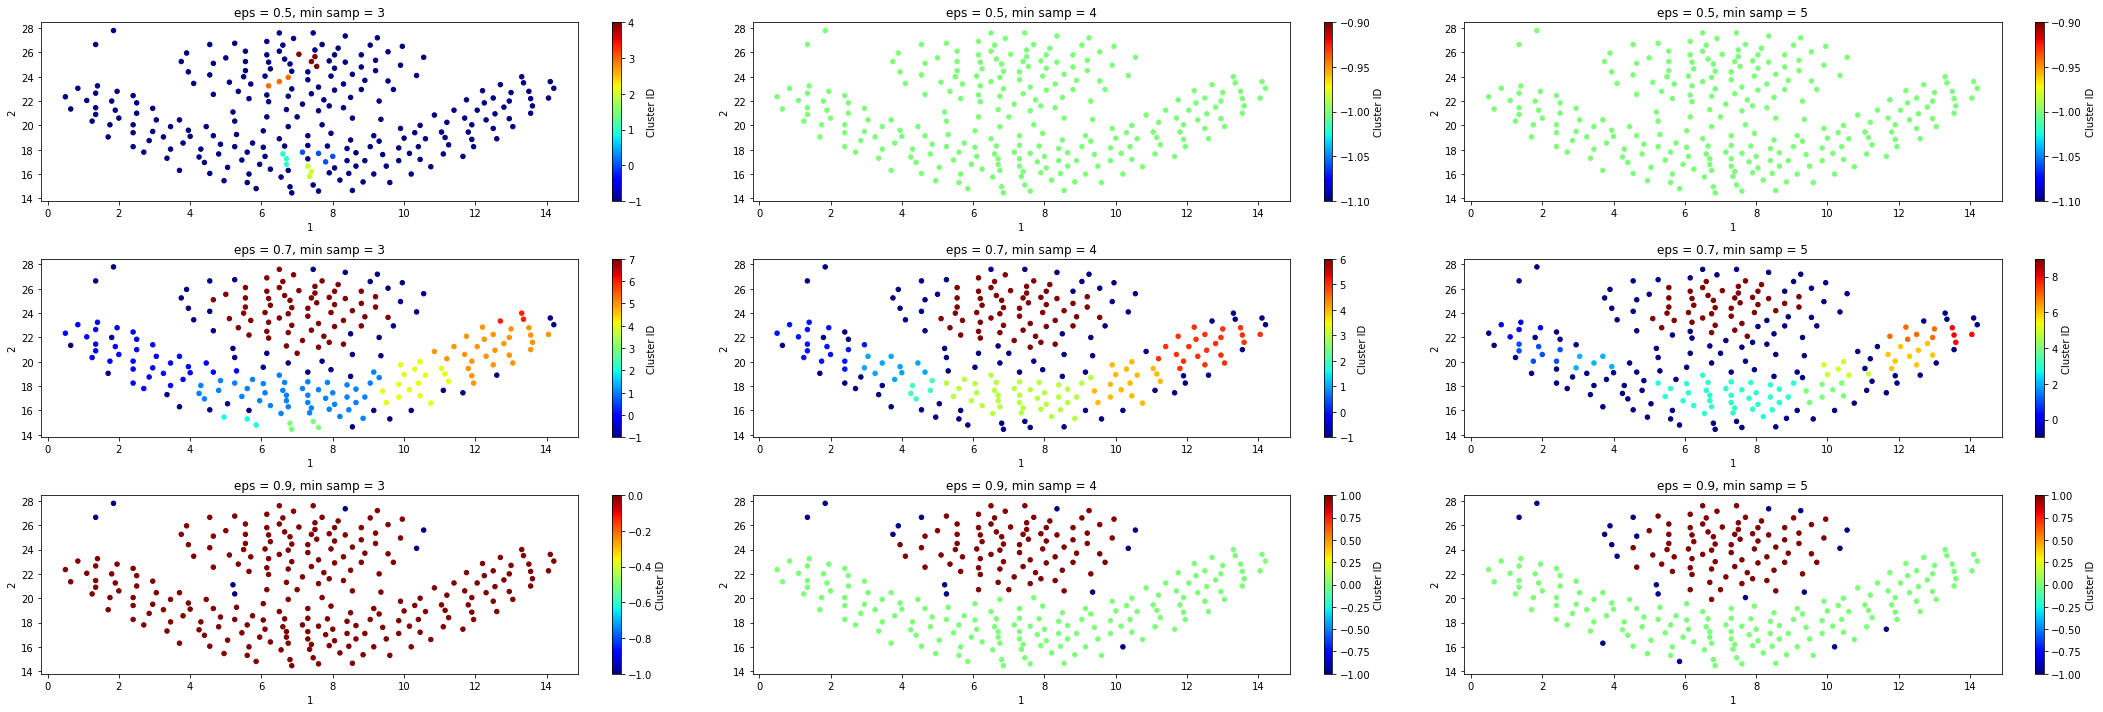

In [16]:
#generate graphs for data with DBSCAN
#lists for the algorithm to run through and use as values for epsilon and min sample
EPs = [0.5, 0.7, 0.9]
minSamples = [3,4,5]
resultRow = []
results = []

for i in EPs:
    resultRow = []
    for j in minSamples:
        db = DBSCAN(eps=i, min_samples=j).fit(flameData)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
        result = pd.concat((flameData,labels), axis=1)
        resultRow.append(result)
        
    results.append(resultRow)
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30,10))
results[0][0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[0,0])
axs[0,0].set_title('eps = 0.5, min samp = 3')
results[0][1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[0,1])
axs[0,1].set_title('eps = 0.5, min samp = 4')
results[0][2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[0,2])
axs[0,2].set_title('eps = 0.5, min samp = 5')
results[1][0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[1,0])
axs[1,0].set_title('eps = 0.7, min samp = 3')
results[1][1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[1,1])
axs[1,1].set_title('eps = 0.7, min samp = 4')
results[1][2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[1,2])
axs[1,2].set_title('eps = 0.7, min samp = 5')
results[2][0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[2,0])
axs[2,0].set_title('eps = 0.9, min samp = 3')
results[2][1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[2,1])
axs[2,1].set_title('eps = 0.9, min samp = 4')
results[2][2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[2,2])
axs[2,2].set_title('eps = 0.9, min samp = 5')
fig.tight_layout()
plt.show()


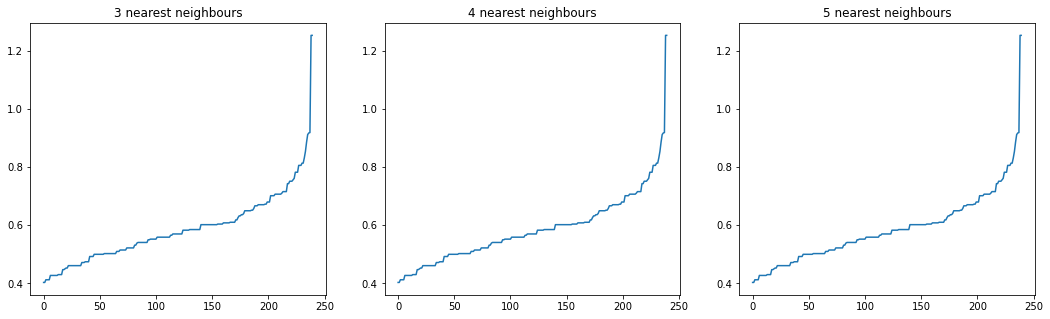

In [17]:
NNs = [3,4,5]

distanceList = []


for i in NNs:
    neighbors = NearestNeighbors(n_neighbors=i)
    neighbors_fit = neighbors.fit(flameData)
    distances, indices = neighbors_fit.kneighbors(flameData)   
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    distanceList.append(distances)


fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
ax1.plot(distanceList[0])
ax1.set_title('3 nearest neighbours')
ax2.plot(distanceList[1])
ax2.set_title('4 nearest neighbours')
ax3.plot(distanceList[2])
ax3.set_title('5 nearest neighbours')

plt.show()


pathbased data

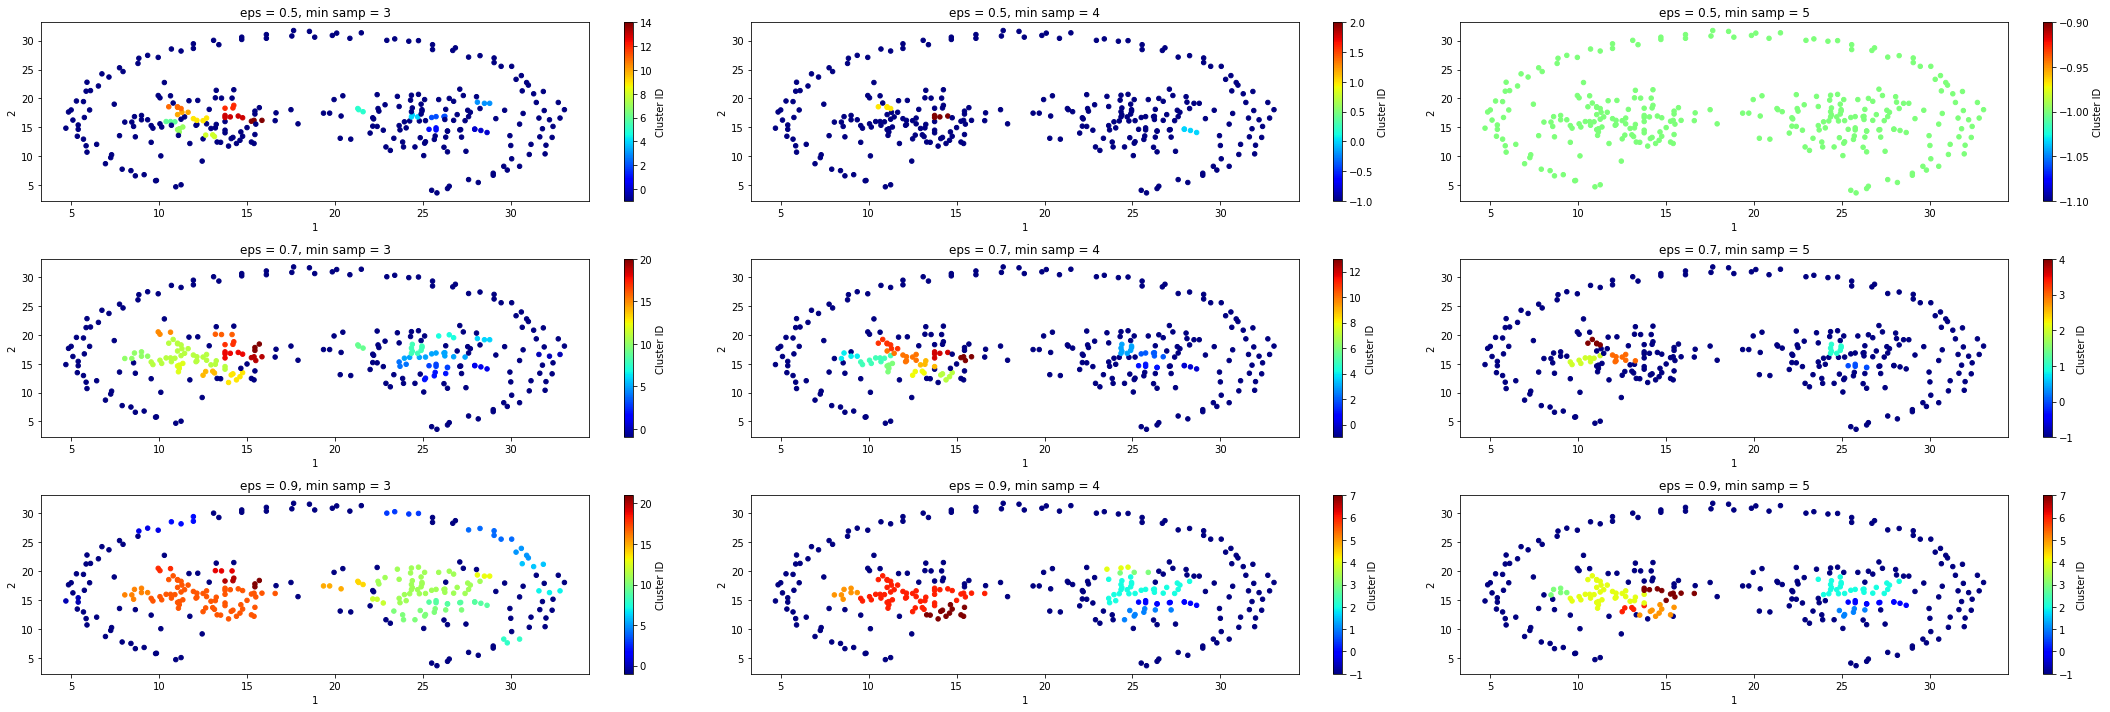

In [18]:
#generate graphs for data with DBSCAN
#lists for the algorithm to run through and use as values for epsilon and min sample
EPs = [0.5, 0.7, 0.9]
minSamples = [3,4,5]
resultRow = []
results = []

for i in EPs:
    resultRow = []
    for j in minSamples:
        db = DBSCAN(eps=i, min_samples=j).fit(pathbasedData)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
        result = pd.concat((pathbasedData,labels), axis=1)
        resultRow.append(result)
        
    results.append(resultRow)
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30,10))
results[0][0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[0,0])
axs[0,0].set_title('eps = 0.5, min samp = 3')
results[0][1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[0,1])
axs[0,1].set_title('eps = 0.5, min samp = 4')
results[0][2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[0,2])
axs[0,2].set_title('eps = 0.5, min samp = 5')
results[1][0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[1,0])
axs[1,0].set_title('eps = 0.7, min samp = 3')
results[1][1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[1,1])
axs[1,1].set_title('eps = 0.7, min samp = 4')
results[1][2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[1,2])
axs[1,2].set_title('eps = 0.7, min samp = 5')
results[2][0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[2,0])
axs[2,0].set_title('eps = 0.9, min samp = 3')
results[2][1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[2,1])
axs[2,1].set_title('eps = 0.9, min samp = 4')
results[2][2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[2,2])
axs[2,2].set_title('eps = 0.9, min samp = 5')
fig.tight_layout()
plt.show()


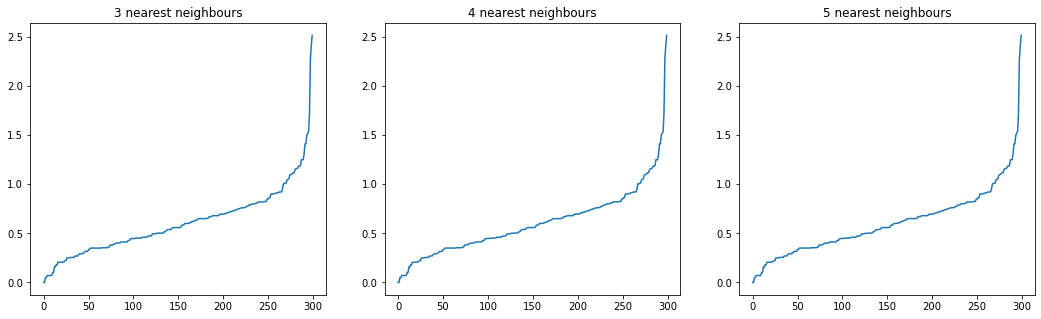

In [19]:
NNs = [3,4,5]

distanceList = []


for i in NNs:
    neighbors = NearestNeighbors(n_neighbors=i)
    neighbors_fit = neighbors.fit(pathbasedData)
    distances, indices = neighbors_fit.kneighbors(pathbasedData)   
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    distanceList.append(distances)


fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
ax1.plot(distanceList[0])
ax1.set_title('3 nearest neighbours')
ax2.plot(distanceList[1])
ax2.set_title('4 nearest neighbours')
ax3.plot(distanceList[2])
ax3.set_title('5 nearest neighbours')

plt.show()


spiral data

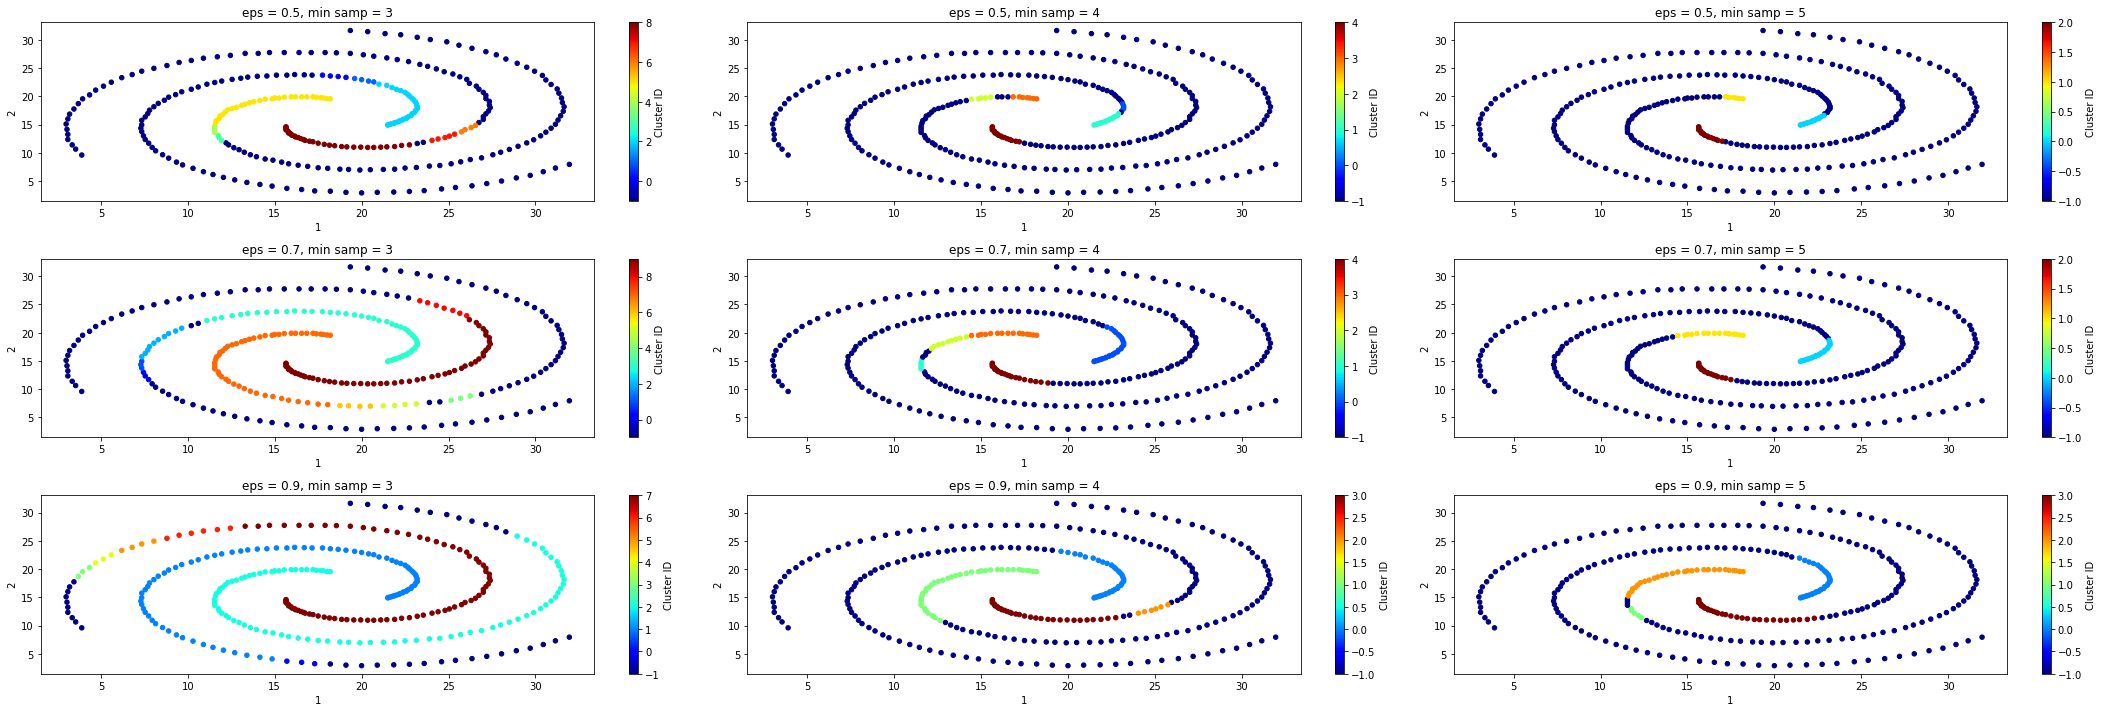

In [20]:
#generate graphs for data with DBSCAN
#lists for the algorithm to run through and use as values for epsilon and min sample
EPs = [0.5, 0.7, 0.9]
minSamples = [3,4,5]
resultRow = []
results = []

for i in EPs:
    resultRow = []
    for j in minSamples:
        db = DBSCAN(eps=i, min_samples=j).fit(spiralData)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
        result = pd.concat((spiralData,labels), axis=1)
        resultRow.append(result)
        
    results.append(resultRow)
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30,10))
results[0][0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[0,0])
axs[0,0].set_title('eps = 0.5, min samp = 3')
results[0][1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[0,1])
axs[0,1].set_title('eps = 0.5, min samp = 4')
results[0][2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[0,2])
axs[0,2].set_title('eps = 0.5, min samp = 5')
results[1][0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[1,0])
axs[1,0].set_title('eps = 0.7, min samp = 3')
results[1][1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[1,1])
axs[1,1].set_title('eps = 0.7, min samp = 4')
results[1][2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[1,2])
axs[1,2].set_title('eps = 0.7, min samp = 5')
results[2][0].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[2,0])
axs[2,0].set_title('eps = 0.9, min samp = 3')
results[2][1].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[2,1])
axs[2,1].set_title('eps = 0.9, min samp = 4')
results[2][2].plot.scatter(x='1',y='2',c='Cluster ID',colormap='jet',ax=axs[2,2])
axs[2,2].set_title('eps = 0.9, min samp = 5')
fig.tight_layout()
plt.show()


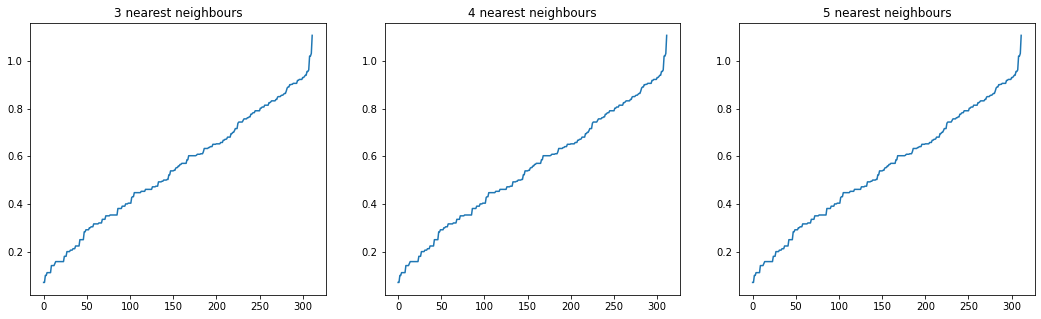

In [21]:
NNs = [3,4,5]

distanceList = []


for i in NNs:
    neighbors = NearestNeighbors(n_neighbors=i)
    neighbors_fit = neighbors.fit(spiralData)
    distances, indices = neighbors_fit.kneighbors(spiralData)   
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    distanceList.append(distances)


fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
ax1.plot(distanceList[0])
ax1.set_title('3 nearest neighbours')
ax2.plot(distanceList[1])
ax2.set_title('4 nearest neighbours')
ax3.plot(distanceList[2])
ax3.set_title('5 nearest neighbours')

plt.show()


## part III

The two clustering methods used in this lab are useful in different ways depending on the data set being used. 

For the compound dataset, DBSCAN provided the better result due to the more precise nature of the algorithm. Since DBSCAN uses a specified epsilon and minimum sample, it is able to have more focused clusters than K-means. 

For the flame dataset, K-means was the better method, due to how close the data was together making it harder for the DBSCAN method to accruately create seperate clusters.

In the pathbased dataset, k-means was better, but neither algorithm performed significantly better than the other. this is likely due to the shape of the data set being not suited to a clustering method in general. The data is very spread out and not easily grouped.


With the spiral dataset, DBSCAN was the better alogrithm, however both algorithms clustered differently, where DBSCAN followed hte tendrils of data and made each one a cluster. K-means clustered the data in fourths cutting across the tendrils.

DBSCAN seems to be better for data that is in strange shapes but connected in certain places. While k-means is better for datasets that are more tradionally clustered.



